In [89]:
# Exp Data Analysis
# https://towardsdatascience.com/a-machine-learning-project-predicting-used-car-prices-efbc4d2a4998#eced
# https://likegeeks.com/python-correlation-matrix/

# PCA:
# https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

# https://stats.stackexchange.com/questions/461752/partial-least-squares-using-python-understanding-predictions

In [90]:
%matplotlib inline

import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from dateutil.parser import parse
from sklearn import metrics

In [91]:
dfX = pd.read_csv("portfolio.csv", sep='\t')
dfX.set_index('Date')

,AAPL,AMZN,EXC,NDAQ,RGLD,Portfolio Val
Date,,,,,,
2015-07-01,2500.000000,2500.000000,1000.000000,3000.000000,1000.000000,10000.000000
2015-07-02,2496.840442,2501.829031,1010.085093,3025.867378,1020.802621,10055.424566
2015-07-06,2488.151659,2492.283774,1006.618342,3003.079450,1038.902539,10029.035764
2015-07-07,2482.030016,2496.170466,1032.776552,3008.006569,1009.500410,10028.484013
2015-07-08,2420.418641,2456.046092,1027.418847,2947.649353,1011.711712,9863.244645
...,...,...,...,...,...,...
2017-12-22,3608.659917,6678.021903,1340.219995,4888.929875,1467.426587,17983.258276
2017-12-26,3517.108291,6726.033974,1333.348834,4891.499952,1485.905041,17953.896092
2017-12-27,3517.726883,6757.470450,1339.532879,4904.992859,1470.308547,17990.031618


In [92]:
dfX = dfX[['Portfolio Val']]
dfX['Portfolio Val'] = dfX['Portfolio Val'].astype(float)
dfX

,Portfolio Val
0,10000.000000
1,10055.424566
2,10029.035764
3,10028.484013
4,9863.244645
...,...
624,17983.258276
625,17953.896092
626,17990.031618
627,17974.392222


In [93]:
data = pd.read_csv("S&P500.csv")
data['Date']  # as a Series
date_array = data['Date'].values  # as a numpy array
d_list = []
for date in date_array:
    dt = parse(date)
    d_item = (str(dt.date()))    
    d_list.append(d_item)
dfDate = pd.DataFrame(d_list,columns=['Date'])
dfDate.set_index('Date')
dfSP500 = pd.read_csv("S&P500.csv")
dfSP500.set_index('Date')
dfSP500 = dfSP500.rename(columns={'Price':'SP500', 'Date':'ODate'})

for i, col in enumerate(dfSP500.columns):
    dfSP500.iloc[:, i] = dfSP500.iloc[:, i].str.replace(',', '')
    
dfSP500 = dfSP500.join(dfDate)
dfSP500 = dfSP500.dropna()
dfSP500 = dfSP500[['SP500']]
dfSP500['SP500'] = dfSP500['SP500'].astype(float)
dfSP500 = dfSP500[::-1]
dfSP500.reset_index(inplace=True, drop=True)

In [94]:
dfX = dfX.join(dfSP500)
dfX.dropna()

,Portfolio Val,SP500
0,10000.000000,2077.42
1,10055.424566,2076.78
2,10029.035764,2068.76
3,10028.484013,2081.34
4,9863.244645,2046.68
...,...,...
624,17983.258276,2679.25
625,17953.896092,2684.57
626,17990.031618,2683.34
627,17974.392222,2680.50


In [95]:
dfX['Rolling_mean_PV'] = dfX['Portfolio Val'].rolling(5).mean()
dfX['Rolling_std_PV'] = dfX['Portfolio Val'].rolling(5).std()
dfX['upper_band_PV'] = dfX['Rolling_mean_PV']+ (2*dfX['Rolling_std_PV'])
dfX['lower_band_PV'] = dfX['Rolling_mean_PV']- (2*dfX['Rolling_std_PV'])
dfX['BB'] = (dfX['Portfolio Val']- dfX['Rolling_mean_PV'])/(2*dfX['Rolling_std_PV'])
dfX.fillna(dfX.mean())

,Portfolio Val,SP500,Rolling_mean_PV,Rolling_std_PV,upper_band_PV,lower_band_PV,BB
0,10000.000000,2077.42,13369.735506,104.566367,13578.868239,13160.602773,0.107968
1,10055.424566,2076.78,13369.735506,104.566367,13578.868239,13160.602773,0.107968
2,10029.035764,2068.76,13369.735506,104.566367,13578.868239,13160.602773,0.107968
3,10028.484013,2081.34,13369.735506,104.566367,13578.868239,13160.602773,0.107968
4,9863.244645,2046.68,9995.237797,76.346138,10147.930074,9842.545520,-0.864439
...,...,...,...,...,...,...,...
624,17983.258276,2679.25,18034.986713,109.541511,18254.069735,17815.903691,-0.236113
625,17953.896092,2684.57,17983.406597,50.021882,18083.450361,17883.362832,-0.294976
626,17990.031618,2683.34,17967.594727,19.109936,18005.814600,17929.374854,0.587048
627,17974.392222,2680.50,17973.523356,14.224080,18001.971516,17945.075196,0.030542


In [96]:
dfX.describe()

,Portfolio Val,SP500,Rolling_mean_PV,Rolling_std_PV,upper_band_PV,lower_band_PV,BB
count,629.000000,629.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,13373.595923,2223.049141,13369.735506,104.566367,13578.868239,13160.602773,0.107968
std,2352.693243,207.102255,2335.808491,65.500885,2324.243397,2354.616353,0.503634
min,9500.286457,1829.080000,9839.985634,5.041378,10144.953111,9048.230215,-0.887889
25%,11281.620234,2071.180000,11271.397308,61.324932,11466.753995,11091.556441,-0.302416
50%,13302.268737,2168.270000,13303.927717,90.126445,13519.850888,13092.697880,0.202620
75%,15365.576956,2396.920000,15363.311964,135.399861,15604.631598,15041.415126,0.546905
max,18309.025416,2690.160000,18207.281931,528.000548,18504.266930,18027.006482,0.894274


In [98]:
X_head = dfX.iloc[:, dfX.columns != 'Portfolio Val']

In [99]:
dfX[4:].to_csv('XY_var.csv', sep='\t', encoding='utf-8')

In [100]:
y = pd.read_csv("XY_var.csv", sep='\t')

In [101]:
y = y['Portfolio Val'].to_numpy()

In [102]:
y.shape

(625,)

In [103]:
x = pd.read_csv("XY_var.csv", sep='\t')

In [104]:
x = x[['SP500', 'Rolling_std_PV', 'BB']]

In [105]:
x = x.to_numpy()

In [106]:
x.shape

(625, 3)

# Principal Component Analysis

In [107]:
# https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

Exp Data Analysis:
    # https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
    # https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

In [108]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x_scaled = StandardScaler().fit_transform(x)
x_scaled[:5]

array([[-0.85548201, -0.43118244, -1.93232778],
       [-0.83314324, -0.33829692, -0.88693089],
       [-0.71102787, -0.12608854,  0.98926156],
       [-0.60015425,  0.70595488,  1.17633577],
       [-0.55504249,  1.41900195,  0.93329447]])

In [109]:
features = x_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00160256, -0.1294226 ,  0.08560615],
       [-0.1294226 ,  1.00160256,  0.04091849],
       [ 0.08560615,  0.04091849,  1.00160256]])

In [110]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([0.82578974, 1.14020745, 1.0388105 ])

In [111]:
vectors[:5]

array([[-0.66068313, -0.74167153,  0.11584964],
       [-0.59336703,  0.61051353,  0.5245844 ],
       [ 0.45979709, -0.27784271,  0.84343943]])

In [112]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print (np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.2748228260576527, 0.3794610383653168, 0.34571613557703046]


In [113]:
projected_1 = x_scaled.dot(vectors.T[0])
projected_2 = x_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-0.067427,0.908127,9863.244645
1,0.343370,0.657811,9924.323042
2,0.999440,0.175511,10107.138356
3,0.518497,0.549276,10244.621207
4,-0.046156,1.018670,10319.947293


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1'>

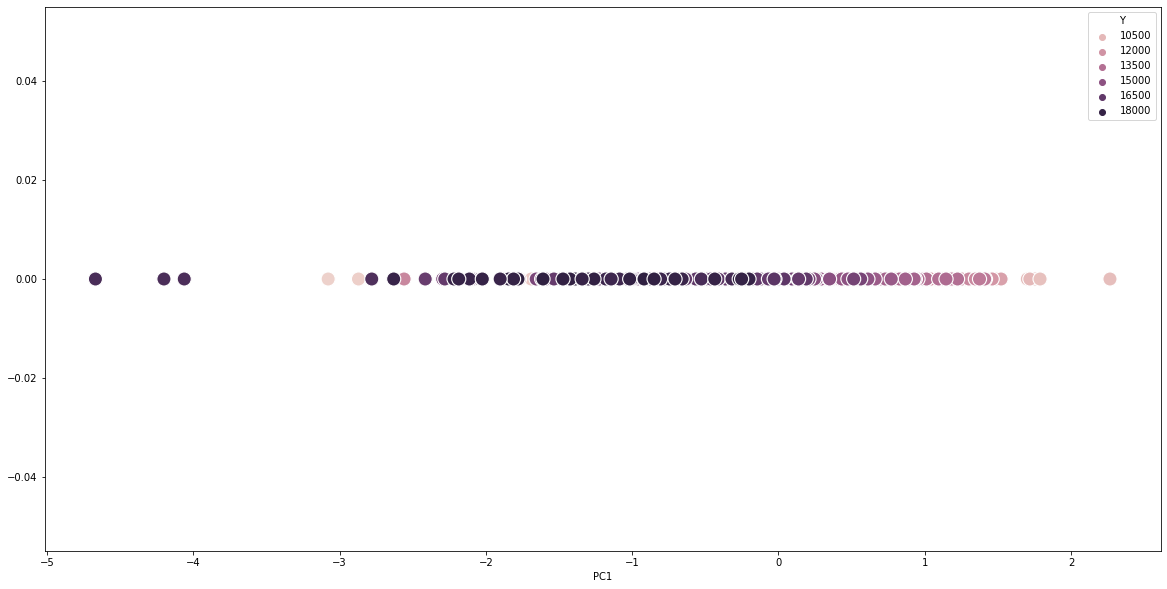

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1'>

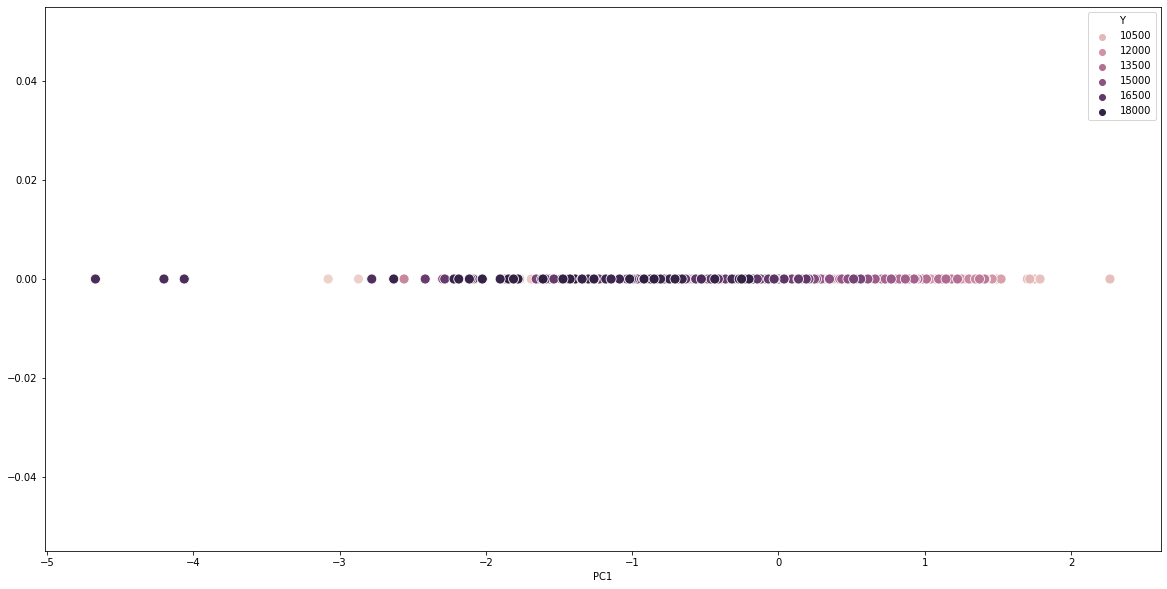

In [115]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=100)

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [117]:
finalDf = pd.concat([principalDf, dfX[['Portfolio Val']]], axis = 1)
finalDf

,principal component 1,principal component 2,Portfolio Val
0,-175.853803,-36.203245,10000.000000
1,-171.503103,-29.920823,10055.424566
2,-146.846297,-14.902315,10029.035764
3,-126.350251,40.536380,10028.484013
4,-119.118435,87.578963,9863.244645
...,...,...,...
624,460.405353,-28.885675,17983.258276
625,NaN,NaN,17953.896092
626,NaN,NaN,17990.031618
627,NaN,NaN,17974.392222


In [118]:
pca.explained_variance_ratio_

array([0.91100081, 0.08899388])

In [119]:
x

array([[ 2.04668000e+03,  7.63461385e+01, -8.64438959e-01],
       [ 2.05131000e+03,  8.24253526e+01, -3.38362906e-01],
       [ 2.07662000e+03,  9.63140651e+01,  6.05795175e-01],
       ...,
       [ 2.68334000e+03,  1.91099364e+01,  5.87047761e-01],
       [ 2.68050000e+03,  1.42240800e+01,  3.05421013e-02],
       [ 2.68262000e+03,  5.49079611e+01, -8.66578690e-01]])

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Decision Tree Model

In [121]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [122]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

ValueError: Length of passed values is 3, index implies 6.

<AxesSubplot:>

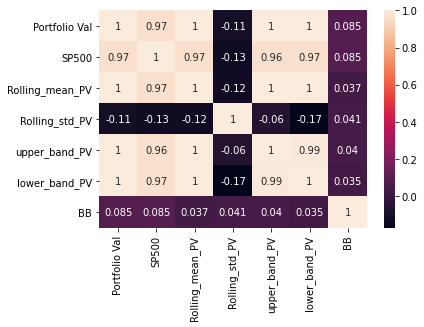

In [123]:
import matplotlib.pylab as plt
import seaborn as sns
# calculate correlation matrix
corr = dfX.corr()# plot the heatmap
sns.heatmap(corr, annot=True)
#xticklabels=corr.columns, yticklabels=corr.columns,
#, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Random Forest Regressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50)

In [ ]:
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
bagging = RandomForestRegressor(max_features=None)# or we can pass max_features = len(X_train.columns) = 13
bagging.fit(x_train,y_train)
print('Training score ',bagging.score(x_train,y_train))
print('Test Error ',bagging.score(x_test,y_test))

In [ ]:
rf = RandomForestRegressor(max_features = 1) # same as book
rf.fit(x_train,y_train)
print('Training score ',rf.score(x_train,y_train))
print('Test Error ',rf.score(x_test,y_test))